In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statistics as stat
import utils, pickle
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# leemos el csv de muertes y casos por ciudad
deaths = pd.read_csv('C:/Users/ASUS/Desktop/Brian/2020-1/Analisis_Datos/TA/alldeaths.csv',sep=';')
deaths['Casos'] = deaths['Casos'].apply(pd.to_numeric)
deaths.sample(5)
#deaths.info()
deaths.shape

(463, 4)

In [6]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
IS_LOCAL = False
import os

def draw_map(dataset,variable, title, colorscale):
    trace = go.Choropleth(
                locations = dataset['Pais'],
                locationmode='country names',
                z = dataset[variable],
                text = dataset['Pais'],
                autocolorscale =False,
                colorscale = colorscale,
                marker = dict(
                    line = dict(
                        color = 'rgb(0,0,0)',
                        width = 0.5)
                ),
                colorbar = dict(
                    title = variable,
                    tickprefix = '')
            )
    data = [trace]
    layout = go.Layout(
        title = title,
        geo = dict(
            showframe = True,
            showlakes = False,
            showcoastlines = True,
            projection = dict(
                type = 'natural earth'
            )
        )
    )
    fig = dict( data=data, layout=layout )
    iplot(fig)

In [7]:
paises = deaths['Pais'].unique().tolist()
country_deaths = []
for pais in paises:
    row = {}
    row['Pais'] = pais
    row['Casos'] = np.sum(np.asarray(deaths[deaths['Pais'] == pais]['Casos'].tolist()))
    country_deaths.append(row) 
df =  pd.DataFrame(country_deaths)
draw_map(df,'Casos', 'Total de Casos por País', 'Rainbow')

In [8]:
paises = deaths['Pais'].unique().tolist()
country_deaths = []
for pais in paises:
    row = {}
    row['Pais'] = pais
    row['Muertes'] = np.sum(np.asarray(deaths[deaths['Pais'] == pais]['Muertes'].tolist()))
    country_deaths.append(row) 
df =  pd.DataFrame(country_deaths)
draw_map(df, 'Muertes','Total de Muertes por País', 'Rainbow')

In [9]:
# leemos el csv de contaminantes por ciudad desde el 2019
contamin = pd.read_csv('C:/Users/ASUS/Desktop/Brian/2020-1/Analisis_Datos/TA/datosCompletos.csv',sep=';')
contamin = contamin.drop(['Unnamed: 0'], axis=1)
contamin.sample(10)
#contamin.info()
#contamin.shape

,Ciudad,Pais,PM25,PM10,O3,NO2,Fecha
23771,Hesse,Germany,21.0,12.6,13.4,8.4,30/12/2019
36133,Manitoba,Canada,11.0,11.0,10.0,NaN,4/05/2020
29560,Jiangxi,Mainland China,160.0,63.0,22.0,19.0,28/10/2019
40937,New Brunswick,Canada,19.0,NaN,33.0,4.0,20/05/2020
20600,Gunma,Japan,32.0,6.0,33.0,7.0,20/01/2020
26368,Hyogo,Japan,39.0,11.0,33.0,13.0,28/10/2019
29649,Jiangxi,Mainland China,94.0,42.0,26.0,7.0,25/01/2020
24778,Hokkaido,Japan,88.0,34.0,36.0,5.0,3/11/2019
39283,Morelos,Mexico,66.0,48.0,60.0,10.0,23/03/2020
59990,Washington,United States,41.0,NaN,NaN,NaN,11/02/2020


Text(0.5, 0.98, 'Categorical Plotting')

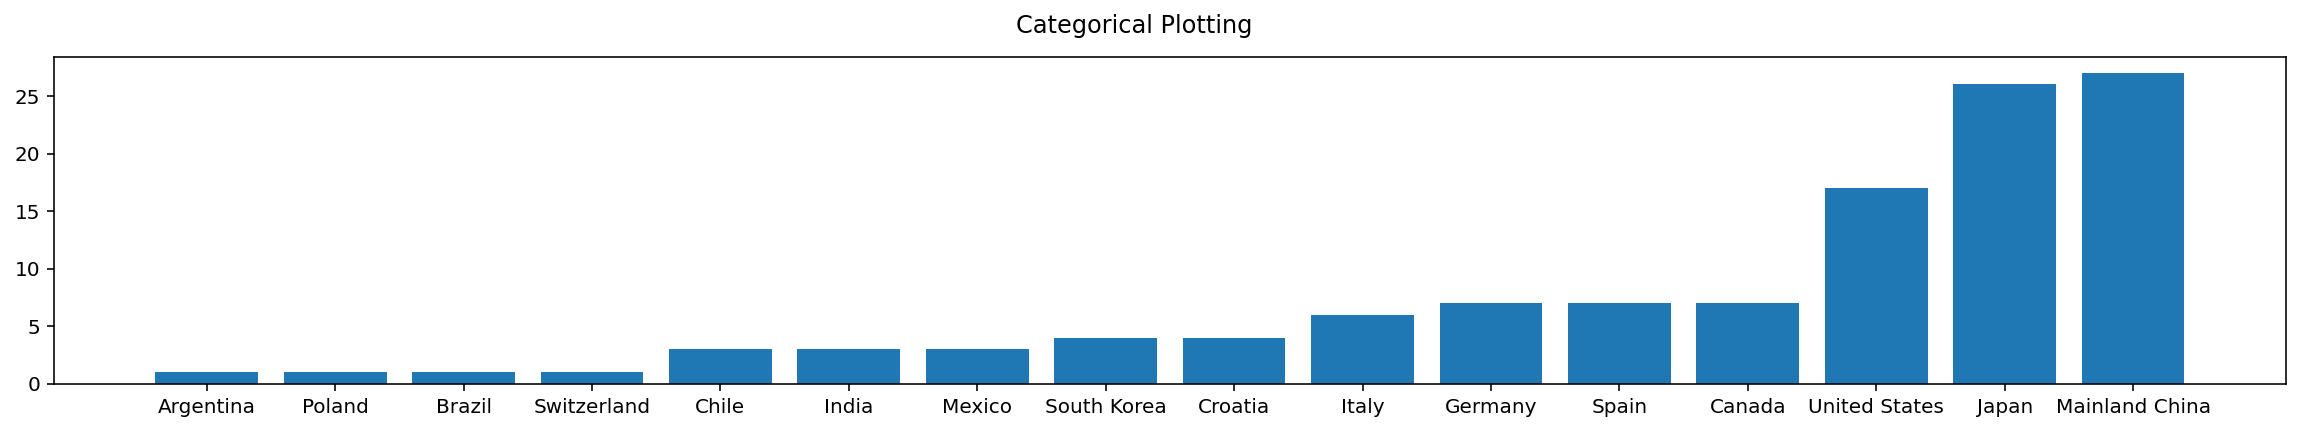

In [10]:
#grafico de ciudades estudiadas por pais
paises = contamin['Pais'].unique().tolist()
city_country = []
for pais in paises:
    row = {}
    l = contamin[contamin['Pais'] == pais]['Ciudad'].unique().tolist()
    row['Pais'] = pais
    row['# Ciudades'] = len(l)
    city_country.append(row) 
df =  pd.DataFrame(city_country)
df = df.sort_values(by='# Ciudades')
#df['# Ciudades'] = df['# Ciudades'].apply(pd.to_numeric)
#df['Pais'] = df['Pais'].to_string()
names = df['Pais'].tolist()
values = df['# Ciudades'].tolist()
fig, axs = plt.subplots( figsize=(20, 3), sharey=True)
axs.bar(names, values)
fig.suptitle('Categorical Plotting')


 Vemos que la mayor proporcion de ciudades que mantienen un control de la calidad de se concentra en unos pocos paises.

In [11]:
# Info de los contaminantes
contamin.info()             # cada fila es una dia distinto de una determinada ciudad desde el 01/2019 hasta 06/20

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62776 entries, 0 to 62775
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ciudad  62776 non-null  object 
 1   Pais    62776 non-null  object 
 2   PM25    57876 non-null  float64
 3   PM10    55783 non-null  float64
 4   O3      58065 non-null  float64
 5   NO2     57652 non-null  float64
 6   Fecha   62776 non-null  object 
dtypes: float64(4), object(3)
memory usage: 3.4+ MB


In [12]:
df1 = contamin
fechas = []
for i in df1['Fecha'].tolist():
    row = {}
    lst = i.split('/')
    row['Dia'] = lst[0]
    row['Mes'] = lst[1]
    row['Año'] = lst[2]
    fechas.append(row)
dfechas =  pd.DataFrame(fechas)

In [13]:
contaminf = pd.concat([contamin, dfechas], axis=1,)
contaminf.sample(5)

,Ciudad,Pais,PM25,PM10,O3,NO2,Fecha,Dia,Mes,Año
12846,Daegu,South Korea,69.0,53.0,44.0,27.0,20/03/2019,20,03,2019
43590,Ohio,United States,33.0,21.0,30.0,12.0,13/05/2020,13,05,2020
12365,Connecticut,United States,23.0,16.0,17.0,3.0,10/05/2019,10,05,2019
30871,Kansas,United States,49.0,9.0,14.0,5.0,16/01/2019,16,01,2019
19007,Georgia,United States,46.0,11.0,26.0,6.0,23/01/2020,23,01,2020


In [14]:
contaminf = contaminf.drop(['Fecha'], axis=1)
contaminf.sample(5)

,Ciudad,Pais,PM25,PM10,O3,NO2,Dia,Mes,Año
9557,Catalonia,Spain,NaN,27.0,28.0,10.0,28,05,2020
33469,Kyoto,Japan,63.0,26.0,68.0,24.0,30,04,2020
10837,City of Zagreb,Croatia,NaN,11.0,NaN,17.0,17,07,2019
18671,Georgia,United States,14.0,16.0,7.0,10.0,21,02,2019
17837,Gansu,Mainland China,75.0,47.0,21.0,22.0,9,10,2019


In [15]:
# tratando de completar los valores
contaminf2 = contaminf.copy()
for i in contaminf2['Ciudad'].unique().tolist():
    df = contaminf2[contaminf2['Ciudad'] == i] # cada ciudad
    #print(df)
    
    for k in contaminf2['Mes'].unique().tolist():
        df1 = df[(df['Mes'] == k) & (df['Año']=='2019')]
        #print('########################')
        #print(df)
        for j1 in ['PM25','PM10','O3','NO2']:
            #print(j1)
            if (len(df1[j1].index[df1[j1].apply(np.isnan)].tolist()) == 0):
                continue
            else:
                indexs = df1.index[df1[j1].apply(np.isnan)].tolist()
                contaminf2.loc[indexs, j1] =  df1[j1].mean()
                
    df = contaminf2[contaminf2['Ciudad'] == i] 
    for h in ['01','02','03','04','05','06']:
        df2 = df[(df['Mes'] == h) & (df['Año']=='2020')]
        for j2 in ['PM25','PM10','O3','NO2']:
            if (len(df[j2].index[df[j2].apply(np.isnan)].tolist()) == 0):
                continue
            else:
                indexs = df2[j2].index[df2[j2].apply(np.isnan)].tolist()
                contaminf2.loc[indexs, j2] =  df2[j2].mean()
                
df            
        

,Ciudad,Pais,PM25,PM10,O3,NO2,Dia,Mes,Año
62244,Zhejiang,Mainland China,139.0,61.0,1.0,19.0,1,01,2019
62245,Zhejiang,Mainland China,150.0,72.0,11.0,23.0,2,01,2019
62246,Zhejiang,Mainland China,162.0,92.0,3.0,32.0,3,01,2019
62247,Zhejiang,Mainland China,183.0,67.0,1.0,29.0,4,01,2019
62248,Zhejiang,Mainland China,142.0,26.0,2.0,20.0,5,01,2019
...,...,...,...,...,...,...,...,...,...
62771,Zhejiang,Mainland China,64.0,23.0,16.0,22.0,11,06,2020
62772,Zhejiang,Mainland China,52.0,34.0,44.0,17.0,12,06,2020
62773,Zhejiang,Mainland China,72.0,43.0,55.0,17.0,13,06,2020
62774,Zhejiang,Mainland China,81.0,41.0,42.0,18.0,14,06,2020


In [16]:
#contaminf2.to_csv (r'C:\Users\ASUS\Desktop\Brian\2020-1\Analisis_Datos\TA\datosLimpios2.csv', index = False, header=True)
contaminf2.info() # hemos completado mas datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62776 entries, 0 to 62775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ciudad  62776 non-null  object 
 1   Pais    62776 non-null  object 
 2   PM25    58366 non-null  float64
 3   PM10    56330 non-null  float64
 4   O3      58643 non-null  float64
 5   NO2     58264 non-null  float64
 6   Dia     62776 non-null  object 
 7   Mes     62776 non-null  object 
 8   Año     62776 non-null  object 
dtypes: float64(4), object(5)
memory usage: 4.3+ MB


In [17]:
new = []
for fecha in contamin['Fecha'].tolist():
    lst = fecha.split('/')
    nfecha = lst[2]+'-'+lst[1]+'-'+lst[0]
    new.append(nfecha)
#new

In [18]:
contaminf2['Fecha']  = new
contaminf2

,Ciudad,Pais,PM25,PM10,O3,NO2,Dia,Mes,Año,Fecha
0,Araucania,Chile,21.67,16.0,16.0,2.0,1,01,2019,2019-01-1
1,Araucania,Chile,32.00,16.0,16.0,3.0,2,01,2019,2019-01-2
2,Araucania,Chile,22.00,17.0,17.0,3.0,3,01,2019,2019-01-3
3,Araucania,Chile,27.00,20.0,20.0,3.0,4,01,2019,2019-01-4
4,Araucania,Chile,13.00,20.0,20.0,2.0,5,01,2019,2019-01-5
...,...,...,...,...,...,...,...,...,...,...
62771,Zhejiang,Mainland China,64.00,23.0,16.0,22.0,11,06,2020,2020-06-11
62772,Zhejiang,Mainland China,52.00,34.0,44.0,17.0,12,06,2020,2020-06-12
62773,Zhejiang,Mainland China,72.00,43.0,55.0,17.0,13,06,2020,2020-06-13
62774,Zhejiang,Mainland China,81.00,41.0,42.0,18.0,14,06,2020,2020-06-14


In [19]:
contaminf2['Ciudad'].unique()

array(['Araucania', 'Aichi', 'Baden-Wurttemberg', 'Basque Country',
       'Alberta', 'Beijing', 'Anhui', 'Antofagasta', 'Berlin',
       'Brandenburg', 'Busan', 'Bremen', 'California', 'Buenos Aires',
       'Campania', 'Canary Islands', 'Castile and Leon', 'Catalonia',
       'Chiba', 'Chongqing', 'City of Zagreb', 'Colorado',
       'Community of Madrid', 'Connecticut', 'Daegu', 'Emilia-Romagna',
       'Delhi', 'Ehime', 'Florida', 'Fujian', 'Fukuoka', 'Fukui',
       'Galicia', 'Gansu', 'Guangdong Province', 'Georgia', 'Guangxi',
       'Gifu', 'Gunma', 'Gyeonggi-do', 'Hainan', 'Hamburg', 'Henan',
       'Hebei', 'Hesse', 'Heilongjiang', 'Hokkaido', 'Hubei', 'Hunan',
       'Hyogo', 'Ibaraki', 'Iowa', 'Ishikawa', 'Istria County', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Kanagawa', 'Kansas', 'Kerala', 'Kochi',
       'Kumamoto', 'Kyoto', 'Liaoning', 'Lazio', 'Lombardy', 'Louisiana',
       'Manitoba', 'Maryland', 'Massachusetts', 'Maule', 'Mie', 'Nara',
       'Morelos', 'Navarre', 'N

In [20]:
df = contaminf2[contaminf2['Ciudad'] == 'Community of Madrid']
df.isnull().sum()

Ciudad    0
Pais      0
PM25      0
PM10      0
O3        0
NO2       0
Dia       0
Mes       0
Año       0
Fecha     0
dtype: int64

In [21]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

ciudad = 'Emilia-Romagna'# ,'Beijing'
cont = 'PM25'
df = contaminf2[contaminf2['Ciudad'] == ciudad]
fig = px.line(df, x='Fecha', y=cont, title='Concentración de '+cont+' en ' + ciudad)

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")])))
fig.show()

# boxplot
df =contaminf2[contaminf2['Ciudad'] == ciudad]
y0 = np.random.randn(50)
y1 = np.random.randn(50) + 1 # shift mean

fig = go.Figure()
fig.add_trace(go.Box(y=df[(df['Mes']=='01')&(df['Año']=='2019')][cont], name='Ene19',marker_color = 'rgb(0, 0, 255)'))
fig.add_trace(go.Box(y=df[(df['Mes']=='02')&(df['Año']=='2019')][cont], name = 'Feb19', marker_color = 'rgb(240, 128, 128)'))
fig.add_trace(go.Box(y=df[(df['Mes']=='03')&(df['Año']=='2019')][cont], name = 'Mar19', marker_color = 'rgb(220, 20, 60)'))
fig.add_trace(go.Box(y=df[(df['Mes']=='04')&(df['Año']=='2019')][cont], name = 'Abr19', marker_color = 'rgb(128, 128, 0)'))
fig.add_trace(go.Box(y=df[(df['Mes']=='05')&(df['Año']=='2019')][cont], name = 'May19', marker_color = 'rgb(128, 128, 128)'))
fig.add_trace(go.Box(y=df[(df['Mes']=='06')&(df['Año']=='2019')][cont], name = 'Jun19', marker_color = 'rgb(128, 0, 128)'))
fig.add_trace(go.Box(y=df[(df['Mes']=='07')&(df['Año']=='2019')][cont], name = 'Jul19', marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=df[(df['Mes']=='08')&(df['Año']=='2019')][cont], name = 'Ago19', marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=df[(df['Mes']=='09')&(df['Año']=='2019')][cont], name = 'Sep19', marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=df[(df['Mes']=='10')&(df['Año']=='2019')][cont], name = 'Oct19', marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=df[(df['Mes']=='11')&(df['Año']=='2019')][cont], name = 'Nov19', marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=df[(df['Mes']=='12')&(df['Año']=='2019')][cont], name = 'Dec19', marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=df[(df['Mes']=='01')&(df['Año']=='2020')][cont], name = 'Ene20', marker_color = 'rgb(0, 0, 255)'))
fig.add_trace(go.Box(y=df[(df['Mes']=='02')&(df['Año']=='2020')][cont], name = 'Feb20', marker_color = 'rgb(240, 128, 128)'))
fig.add_trace(go.Box(y=df[(df['Mes']=='03')&(df['Año']=='2020')][cont], name = 'Mar20', marker_color = 'rgb(220, 20, 60)'))
fig.add_trace(go.Box(y=df[(df['Mes']=='04')&(df['Año']=='2020')][cont], name = 'Abr20', marker_color = 'rgb(128, 128, 0)'))
fig.add_trace(go.Box(y=df[(df['Mes']=='05')&(df['Año']=='2020')][cont], name = 'May20', marker_color = 'rgb(128, 128, 128)'))
fig.add_trace(go.Box(y=df[(df['Mes']=='06')&(df['Año']=='2020')][cont], name = 'Jun20', marker_color = 'rgb(128, 0, 128)'))
fig.show()

# bar plot
df = contaminf2[contaminf2['Ciudad'] == ciudad]
verde = []
amarill = []
naranj = []
rojo = []
morado = []
guinda = []
 
for j in [cont]:
    # para 2019
    for mes in df['Mes'].unique().tolist():       
        df1  = df[(df['Mes'] == mes)&(df['Año']=='2019')]
        verde.append(df1[df1[j]<50].shape[0])
        amarill.append(df1[(df1[j]<100) & (df1[j]>=50)].shape[0])    
        naranj.append(df1[(df1[j]<150) & (df1[j]>=100)].shape[0])
        rojo.append(df1[(df1[j]<200) & (df1[j]>=150)].shape[0])
        morado.append(df1[(df1[j]<300) & (df1[j]>=200)].shape[0])
        guinda.append(df1[df1[j]>=300].shape[0])
        
    #para 2020
    for mes in ['01','02','03','04','05','06']:       
        df1  = df[(df['Mes'] == mes)&(df['Año']=='2020')]
        verde.append(df1[df1[j]<50].shape[0])
        amarill.append(df1[(df1[j]<100) & (df1[j]>=50)].shape[0])
        naranj.append(df1[(df1[j]<150) & (df1[j]>=100)].shape[0])
        rojo.append(df1[(df1[j]<200) & (df1[j]>=150)].shape[0])
        morado.append(df1[(df1[j]<300) & (df1['PM25']>=200)].shape[0])
        guinda.append(df1[df1[j]>=300].shape[0]) 

import plotly.graph_objects as go

x=['Ene19', 'Feb19', 'Mar19', 'Abr19','May19','Jun19','Jul19','Ago19','Sep19','Oct19','Nov19','Dec19','Ene20', 'Feb20', 'Mar20', 'Abr20','May20','Jun20']

fig = go.Figure(go.Bar(x=x, y=verde, name='Bueno(0-50)',marker_color='rgb(0, 128, 0)'))
fig.add_trace(go.Bar(x=x, y=amarill, name='Moderado(50-100)',marker_color='rgb(225, 225, 0)'))
fig.add_trace(go.Bar(x=x, y=naranj, name='Alto(100-150)',marker_color='rgb(237,118,14)'))
fig.add_trace(go.Bar(x=x, y=rojo, name='Insalubre(150-200)',marker_color='rgb(220, 0, 0)'))
fig.add_trace(go.Bar(x=x, y=morado, name='Peligroso(200-300)',marker_color='rgb(140,086,138)'))
fig.add_trace(go.Bar(x=x, y=guinda, name='Excesivo(300<)',marker_color='rgb(128, 0,0)'))

fig.update_layout(barmode='stack')
fig.update_layout(title_text='Concentracion de '+cont+' en ' + ciudad )
fig.show()
print(deaths[deaths['Ciudad'] ==ciudad]['Muertes'])

48    4215
Name: Muertes, dtype: int64


In [22]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

ciudad = 'Araucania'#'Araucania''Lombardy'
cont = 'PM25'
df = contaminf2[contaminf2['Ciudad'] == ciudad]
fig = px.line(df, x='Fecha', y=cont, title='Concentración de '+cont+' en ' + ciudad)

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")])))
fig.show()

# boxplot
df =contaminf2[contaminf2['Ciudad'] == ciudad]
y0 = np.random.randn(50)
y1 = np.random.randn(50) + 1 # shift mean

fig = go.Figure()
fig.add_trace(go.Box(y=df[(df['Mes']=='01')&(df['Año']=='2019')][cont], name='Ene19',marker_color = 'rgb(0, 0, 255)'))
fig.add_trace(go.Box(y=df[(df['Mes']=='02')&(df['Año']=='2019')][cont], name = 'Feb19', marker_color = 'rgb(240, 128, 128)'))
fig.add_trace(go.Box(y=df[(df['Mes']=='03')&(df['Año']=='2019')][cont], name = 'Mar19', marker_color = 'rgb(220, 20, 60)'))
fig.add_trace(go.Box(y=df[(df['Mes']=='04')&(df['Año']=='2019')][cont], name = 'Abr19', marker_color = 'rgb(128, 128, 0)'))
fig.add_trace(go.Box(y=df[(df['Mes']=='05')&(df['Año']=='2019')][cont], name = 'May19', marker_color = 'rgb(128, 128, 128)'))
fig.add_trace(go.Box(y=df[(df['Mes']=='06')&(df['Año']=='2019')][cont], name = 'Jun19', marker_color = 'rgb(128, 0, 128)'))
fig.add_trace(go.Box(y=df[(df['Mes']=='07')&(df['Año']=='2019')][cont], name = 'Jul19', marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=df[(df['Mes']=='08')&(df['Año']=='2019')][cont], name = 'Ago19', marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=df[(df['Mes']=='09')&(df['Año']=='2019')][cont], name = 'Sep19', marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=df[(df['Mes']=='10')&(df['Año']=='2019')][cont], name = 'Oct19', marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=df[(df['Mes']=='11')&(df['Año']=='2019')][cont], name = 'Nov19', marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=df[(df['Mes']=='12')&(df['Año']=='2019')][cont], name = 'Dec19', marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=df[(df['Mes']=='01')&(df['Año']=='2020')][cont], name = 'Ene20', marker_color = 'rgb(0, 0, 255)'))
fig.add_trace(go.Box(y=df[(df['Mes']=='02')&(df['Año']=='2020')][cont], name = 'Feb20', marker_color = 'rgb(240, 128, 128)'))
fig.add_trace(go.Box(y=df[(df['Mes']=='03')&(df['Año']=='2020')][cont], name = 'Mar20', marker_color = 'rgb(220, 20, 60)'))
fig.add_trace(go.Box(y=df[(df['Mes']=='04')&(df['Año']=='2020')][cont], name = 'Abr20', marker_color = 'rgb(128, 128, 0)'))
fig.add_trace(go.Box(y=df[(df['Mes']=='05')&(df['Año']=='2020')][cont], name = 'May20', marker_color = 'rgb(128, 128, 128)'))
fig.add_trace(go.Box(y=df[(df['Mes']=='06')&(df['Año']=='2020')][cont], name = 'Jun20', marker_color = 'rgb(128, 0, 128)'))
fig.show()

# bar plot
df = contaminf2[contaminf2['Ciudad'] == ciudad]
verde = []
amarill = []
naranj = []
rojo = []
morado = []
guinda = []
 
for j in [cont]:
    # para 2019
    for mes in df['Mes'].unique().tolist():       
        df1  = df[(df['Mes'] == mes)&(df['Año']=='2019')]
        verde.append(df1[df1[j]<50].shape[0])
        amarill.append(df1[(df1[j]<100) & (df1[j]>=50)].shape[0])    
        naranj.append(df1[(df1[j]<150) & (df1[j]>=100)].shape[0])
        rojo.append(df1[(df1[j]<200) & (df1[j]>=150)].shape[0])
        morado.append(df1[(df1[j]<300) & (df1[j]>=200)].shape[0])
        guinda.append(df1[df1[j]>=300].shape[0])
        
    #para 2020
    for mes in ['01','02','03','04','05','06']:       
        df1  = df[(df['Mes'] == mes)&(df['Año']=='2020')]
        verde.append(df1[df1[j]<50].shape[0])
        amarill.append(df1[(df1[j]<100) & (df1[j]>=50)].shape[0])
        naranj.append(df1[(df1[j]<150) & (df1[j]>=100)].shape[0])
        rojo.append(df1[(df1[j]<200) & (df1[j]>=150)].shape[0])
        morado.append(df1[(df1[j]<300) & (df1['PM25']>=200)].shape[0])
        guinda.append(df1[df1[j]>=300].shape[0]) 

import plotly.graph_objects as go

x=['Ene19', 'Feb19', 'Mar19', 'Abr19','May19','Jun19','Jul19','Ago19','Sep19','Oct19','Nov19','Dec19','Ene20', 'Feb20', 'Mar20', 'Abr20','May20','Jun20']

fig = go.Figure(go.Bar(x=x, y=verde, name='Bueno(0-50)',marker_color='rgb(0, 128, 0)'))
fig.add_trace(go.Bar(x=x, y=amarill, name='Moderado(50-100)',marker_color='rgb(225, 225, 0)'))
fig.add_trace(go.Bar(x=x, y=naranj, name='Alto(100-150)',marker_color='rgb(237,118,14)'))
fig.add_trace(go.Bar(x=x, y=rojo, name='Insalubre(150-200)',marker_color='rgb(220, 0, 0)'))
fig.add_trace(go.Bar(x=x, y=morado, name='Peligroso(200-300)',marker_color='rgb(140,086,138)'))
fig.add_trace(go.Bar(x=x, y=guinda, name='Excesivo(300<)',marker_color='rgb(128, 0,0)'))

fig.update_layout(barmode='stack')
fig.update_layout(title_text='Concentracion de '+cont+' en ' + ciudad )
fig.show()
print(deaths[deaths['Ciudad'] ==ciudad]['Muertes'])

72    36
Name: Muertes, dtype: int64


In [23]:
# Hacemos la variable acumulada
data = []
for i in contaminf2['Ciudad'].unique().tolist():
    df = contaminf2[contaminf2['Ciudad']==i]
    #solo del 2019
   # prom1,prom2,prom3,prom4 =0,0,0,0
    for mes in df['Mes'].unique().tolist():
        row = {}
        row['Ciudad'] = i
        df1 = df[(df['Mes']==mes) &(df['Año']=='2019')]
        if (df1['PM25'].isnull().sum() != 0):
            prom1 = np.nan
        else:
            prom1 = df1['PM25'].mean()
            if (prom1<50):
                prom1 = prom1*1
            elif(prom1>=50 and prom1<100):
                prom1 = prom1*2
            elif(prom1>=100 and prom1<150):
                prom1 = prom1*3
            elif(prom1>=150 and prom1<200):
                prom1 = prom1*4
            elif(prom1>=200 and prom1<300):
                prom1 = prom1*5
            else:
                prom1 = prom1*6
        row['PM25'] = prom1        
                
        if (df1['PM10'].isnull().sum() != 0):
            prom2 = np.nan
        else:
            prom2 = df1['PM10'].mean()
            if (prom2<50):
                prom2 = prom2*1
            elif(prom2>=50 and prom2<100):
                prom2 = prom2*2
            elif(prom2>=100 and prom2<150):
                prom2 = prom2*3
            elif(prom2>=150 and prom2<200):
                prom2 = prom2*4
            elif(prom2>=200 and prom2<300):
                prom2 = prom2*5
            else:
                prom2 = prom2*6
        row['PM10'] = prom2
            
        if (df1['O3'].isnull().sum() != 0):
            prom3 = np.nan
        else:
            prom3 = df1['O3'].mean()
            if (prom3<50):
                prom3 = prom3*1
            elif(prom3>=50 and prom3<100):
                prom3 = prom3*2
            elif(prom3>=100 and prom3<150):
                prom3 = prom3*3
            elif(prom3>=150 and prom3<200):
                prom3 = prom3*4
            elif(prom3>=200 and prom3<300):
                prom3 = prom3*5
            else:
                prom3 = prom3*6
        row['O3'] = prom3

        if (df1['NO2'].isnull().sum() != 0):
            prom4 = np.nan
        else:
            prom4 = df1['NO2'].mean()
            if (prom4<50):
                prom4 = prom4*1
            elif(prom4>=50 and prom4<100):
                prom4 = prom4*2
            elif(prom4>=100 and prom4<150):
                prom4 = prom4*3
            elif(prom4>=150 and prom4<200):
                prom4 = prom4*4
            elif(prom4>=200 and prom4<300):
                prom4 = prom4*5
            else:
                prom4 = prom4*6
        row['NO2'] = prom4
        
        data.append(row)
    
dfacum =  pd.DataFrame(data)
dfacum.shape

(1416, 5)

In [24]:
dfacum = dfacum.dropna()
dfacum.shape

(1101, 5)

In [25]:
len(dfacum['Ciudad'].unique().tolist())

94

In [26]:
data = []
for i in dfacum['Ciudad'].unique().tolist():
    df = dfacum[dfacum['Ciudad'] == i]
    row = {}
    row['Ciudad'] = i
    row['PM25'] = df['PM25'].mean()
    row['PM10'] = df['PM10'].mean()
    row['O3'] = df['O3'].mean()
    row['NO2'] = df['NO2'].mean()
    data.append(row)

dfmean = pd.DataFrame(data)
dfmean.describe()

,PM25,PM10,O3,NO2
count,94.000000,94.000000,94.000000,94.000000
mean,149.853549,53.858091,44.974882,12.746282
std,135.712567,70.819801,21.366446,8.453088
min,1.910477,6.923810,12.783365,0.000000
25%,41.520194,16.185523,30.860610,6.678459
50%,99.196095,23.446933,41.076395,10.774058
75%,212.998131,62.056852,51.225459,16.795248
max,692.790447,564.894357,113.079160,52.443238


In [27]:
#hacemos una estandarizacion min, max:
new_min,new_max = 1, 5

for column in ['PM25','PM10','O3','NO2']:
    new_col= new_min + (new_max-new_min)*(dfmean[column] - dfmean[column].min())/(dfmean[column].max() - dfmean[column].min())
    dfmean[column] = new_col
    
dfmean.sample(10)

,Ciudad,PM25,PM10,O3,NO2
90,Xinjiang,3.753933,2.172872,2.194792,2.622646
46,Kanagawa,1.374147,1.065425,1.675011,2.218712
16,Emilia-Romagna,1.668720,1.134634,2.164229,2.962528
34,Hebei,3.555273,2.304768,4.261809,2.113188
2,Baden-Wurttemberg,1.106715,1.000000,2.425987,1.068874
7,Busan,2.159426,1.355550,2.572595,3.596839
45,Jilin,3.091407,1.880807,3.270726,2.122663
38,Hubei,2.546414,1.664511,4.463148,2.068722
10,Castile and Leon,1.305005,1.095327,1.428222,1.663121
71,Punjab,3.078784,2.032558,1.019331,1.604962


In [28]:
data = []
for i in dfmean['Ciudad'].unique().tolist():
    if i not in deaths['Ciudad'].unique().tolist():
        continue
    df1 = deaths[deaths['Ciudad']==i]
    df2 = dfmean[dfmean['Ciudad'] ==i]
    row = {}
    row['Ciudad'] = i
    row['Pais'] = df1['Pais'].tolist()[0]
    row['PM25'] = df2['PM25'].tolist()[0]
    row['PM10'] = df2['PM10'].tolist()[0]
    row['O3'] = df2['O3'].tolist()[0]
    row['NO2'] = df2['NO2'].tolist()[0]
    row['Casos'] = df1['Casos'].tolist()[0]
    row['Muertes'] = df1['Muertes'].tolist()[0]
    data.append(row)

dfinal = pd.DataFrame(data)
dfinal   

,Ciudad,Pais,PM25,PM10,O3,NO2,Casos,Muertes
0,Araucania,Chile,2.215038,1.462656,3.340179,1.498850,2815,36
1,Aichi,Japan,1.213027,1.042163,2.077343,1.555288,524,34
2,Baden-Wurttemberg,Germany,1.106715,1.000000,2.425987,1.068874,34965,1798
3,Basque Country,Spain,1.250436,1.078567,1.480022,1.894053,13626,1424
4,Beijing,Mainland China,2.856802,1.732076,3.646644,2.415090,587,8
...,...,...,...,...,...,...,...,...
86,Tuscany,Italy,1.544777,1.126821,1.471846,5.000000,10193,1092
87,Xinjiang,Mainland China,3.753933,2.172872,2.194792,2.622646,76,3
88,Yunnan,Mainland China,1.989480,1.274125,2.803093,2.051797,185,2
89,Zurich,Switzerland,1.000000,1.041546,1.673607,1.807697,3655,127


In [29]:
dfinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ciudad   91 non-null     object 
 1   Pais     91 non-null     object 
 2   PM25     91 non-null     float64
 3   PM10     91 non-null     float64
 4   O3       91 non-null     float64
 5   NO2      91 non-null     float64
 6   Casos    91 non-null     int64  
 7   Muertes  91 non-null     int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.8+ KB


In [30]:
dfinal['Muertes'].unique().tolist()

[36,
 34,
 1798,
 1424,
 8,
 6,
 160,
 3,
 5286,
 151,
 1928,
 45,
 8691,
 4219,
 189,
 4215,
 1904,
 4,
 3017,
 1,
 28,
 609,
 2,
 2536,
 7,
 19,
 22,
 232,
 485,
 13,
 92,
 4512,
 43,
 10,
 27,
 93,
 248,
 21,
 18,
 818,
 16482,
 3062,
 24,
 334,
 490,
 452,
 2611,
 50,
 364,
 86,
 6376,
 78,
 52,
 293,
 1885,
 10694,
 317,
 937,
 1092,
 127]

In [31]:
# ya tenemos el dataset junto (91 ciudades con contaminantes, casos y muertos por covid19)

In [41]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

from itertools import cycle
import warnings
warnings.filterwarnings("ignore")

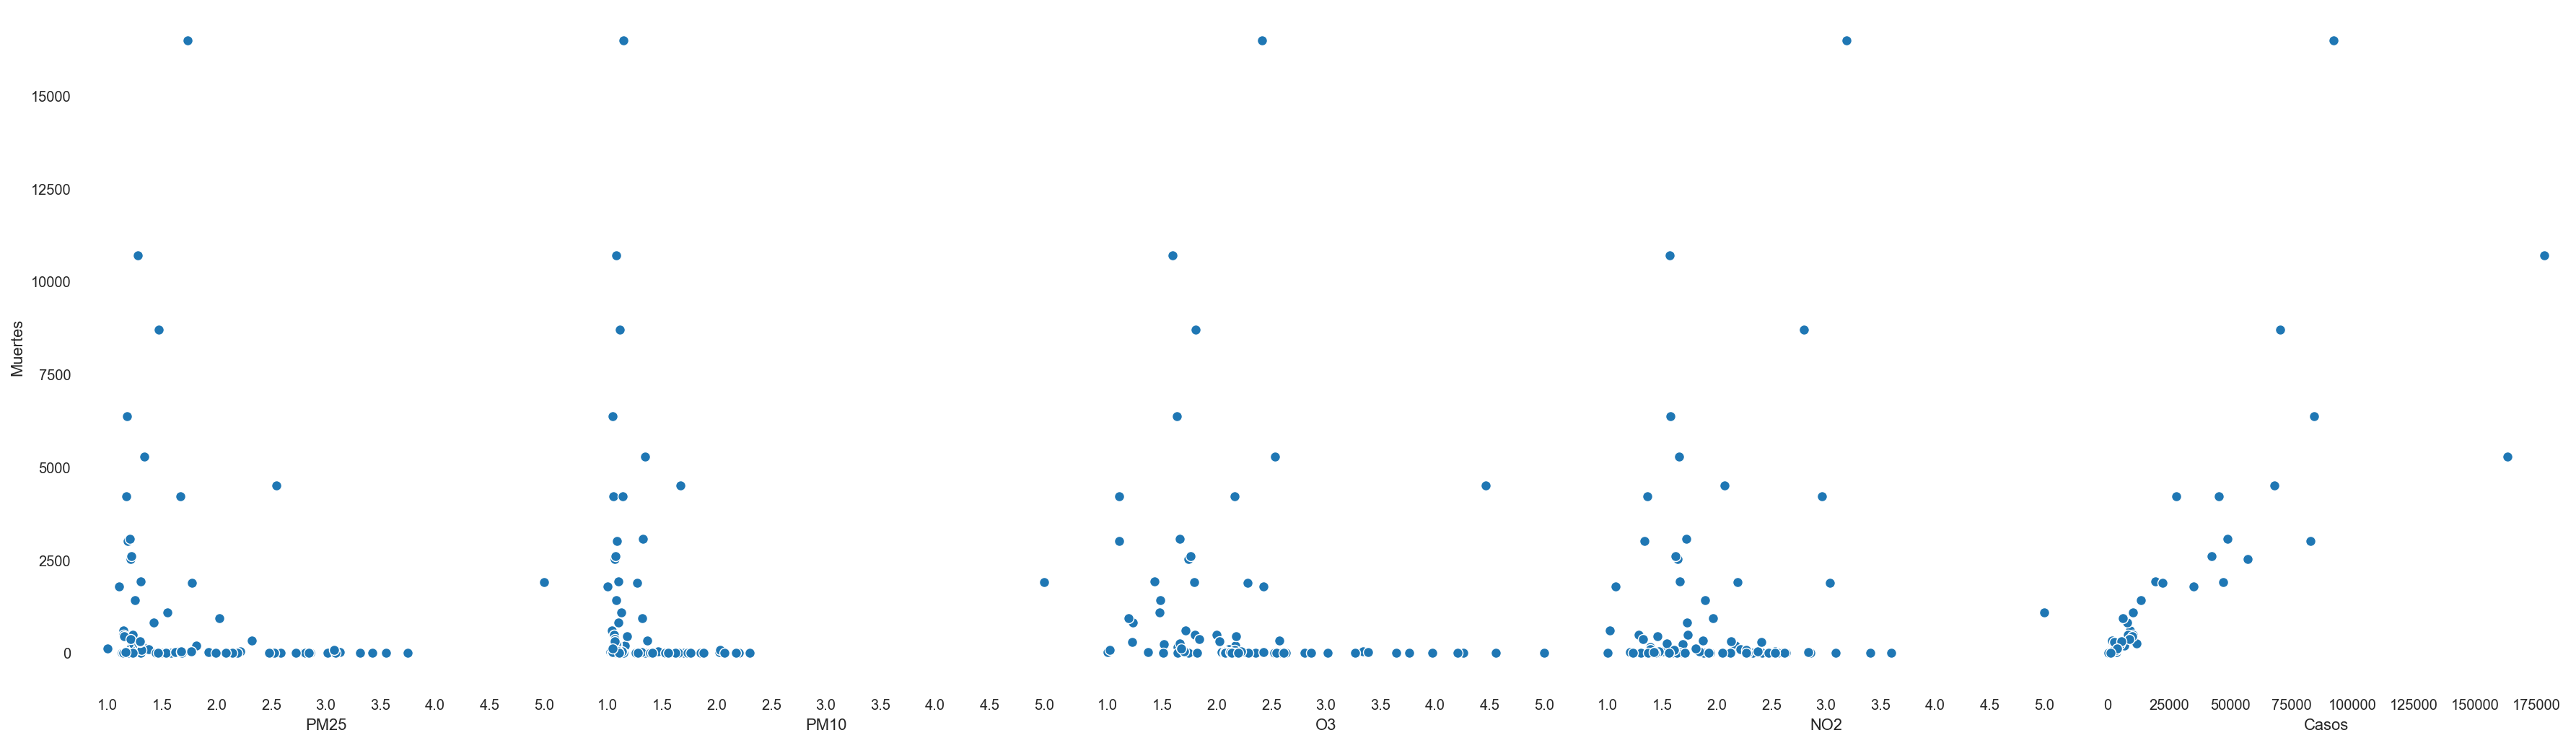

In [33]:
#Lienalidad
import seaborn as sns
p = sns.pairplot(dfinal, x_vars=['PM25','PM10','O3','NO2','Casos'], y_vars='Muertes', size=7, aspect=0.7)

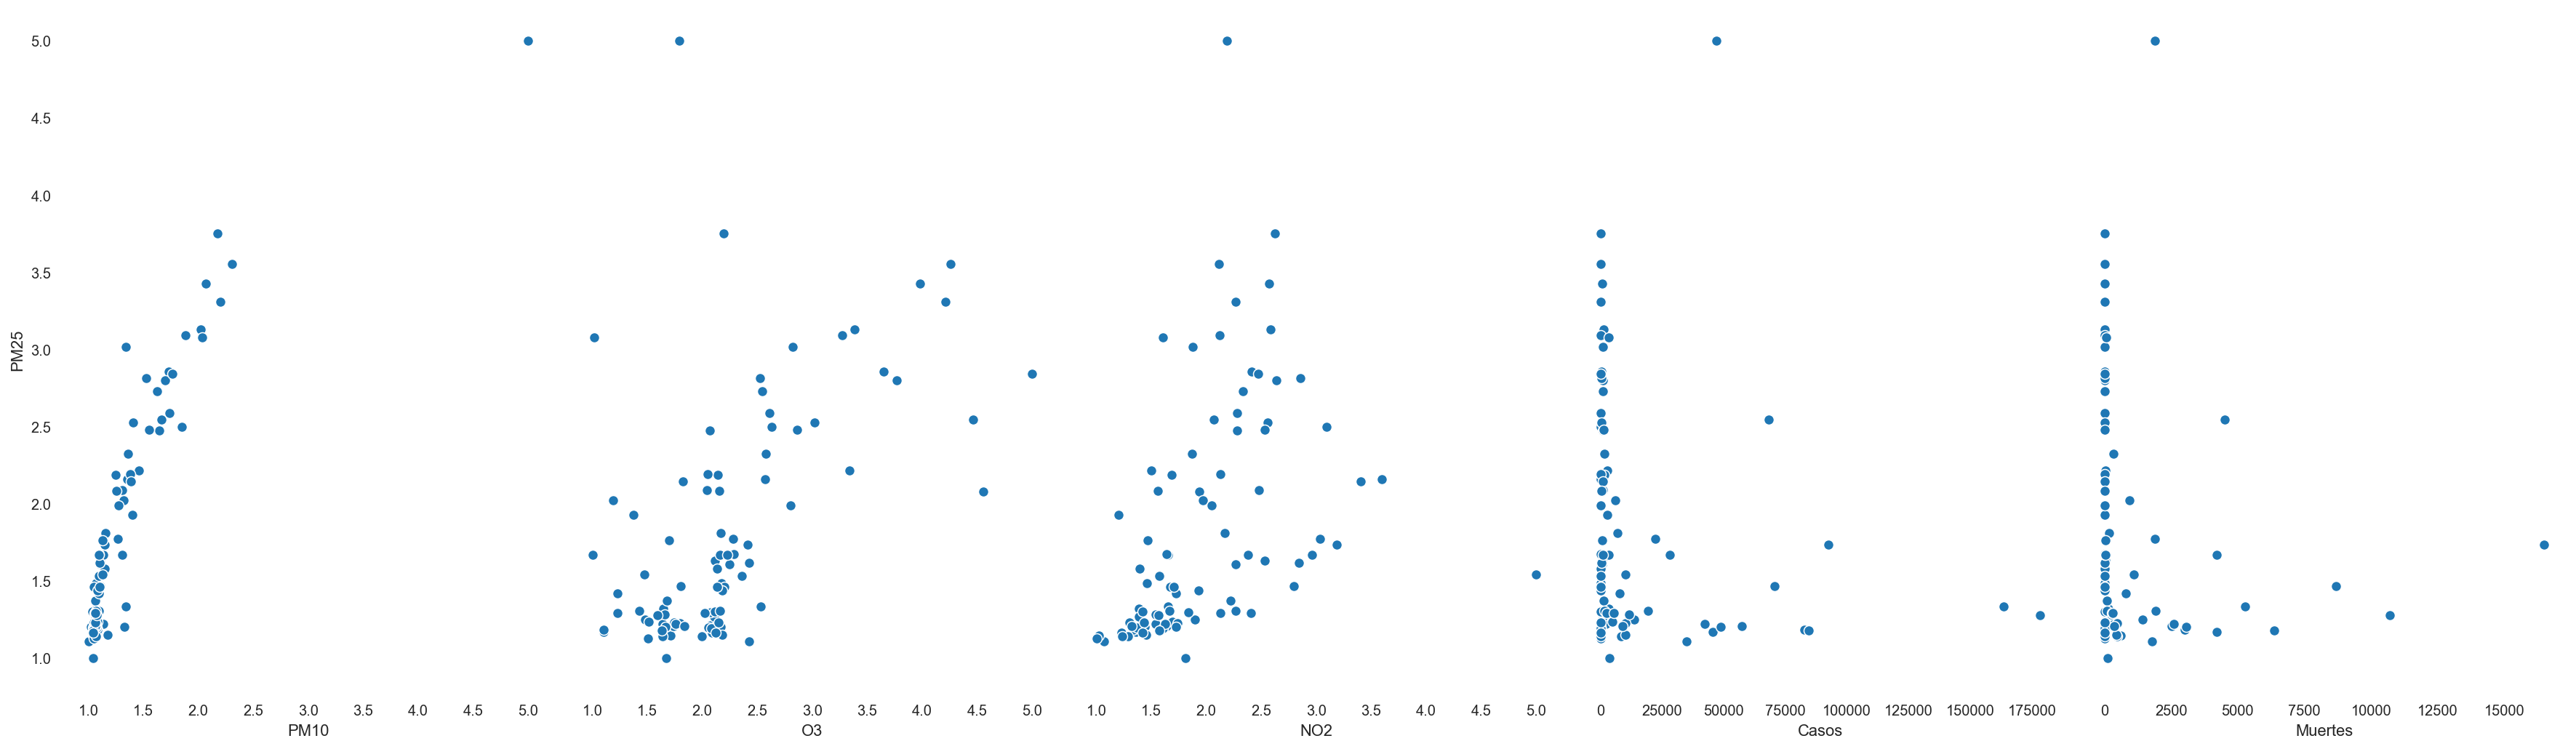

In [38]:
#Lienalidad
import seaborn as sns
p = sns.pairplot(dfinal, x_vars=['PM10','O3','NO2','Casos','Muertes'], y_vars='PM25', size=7, aspect=0.7)

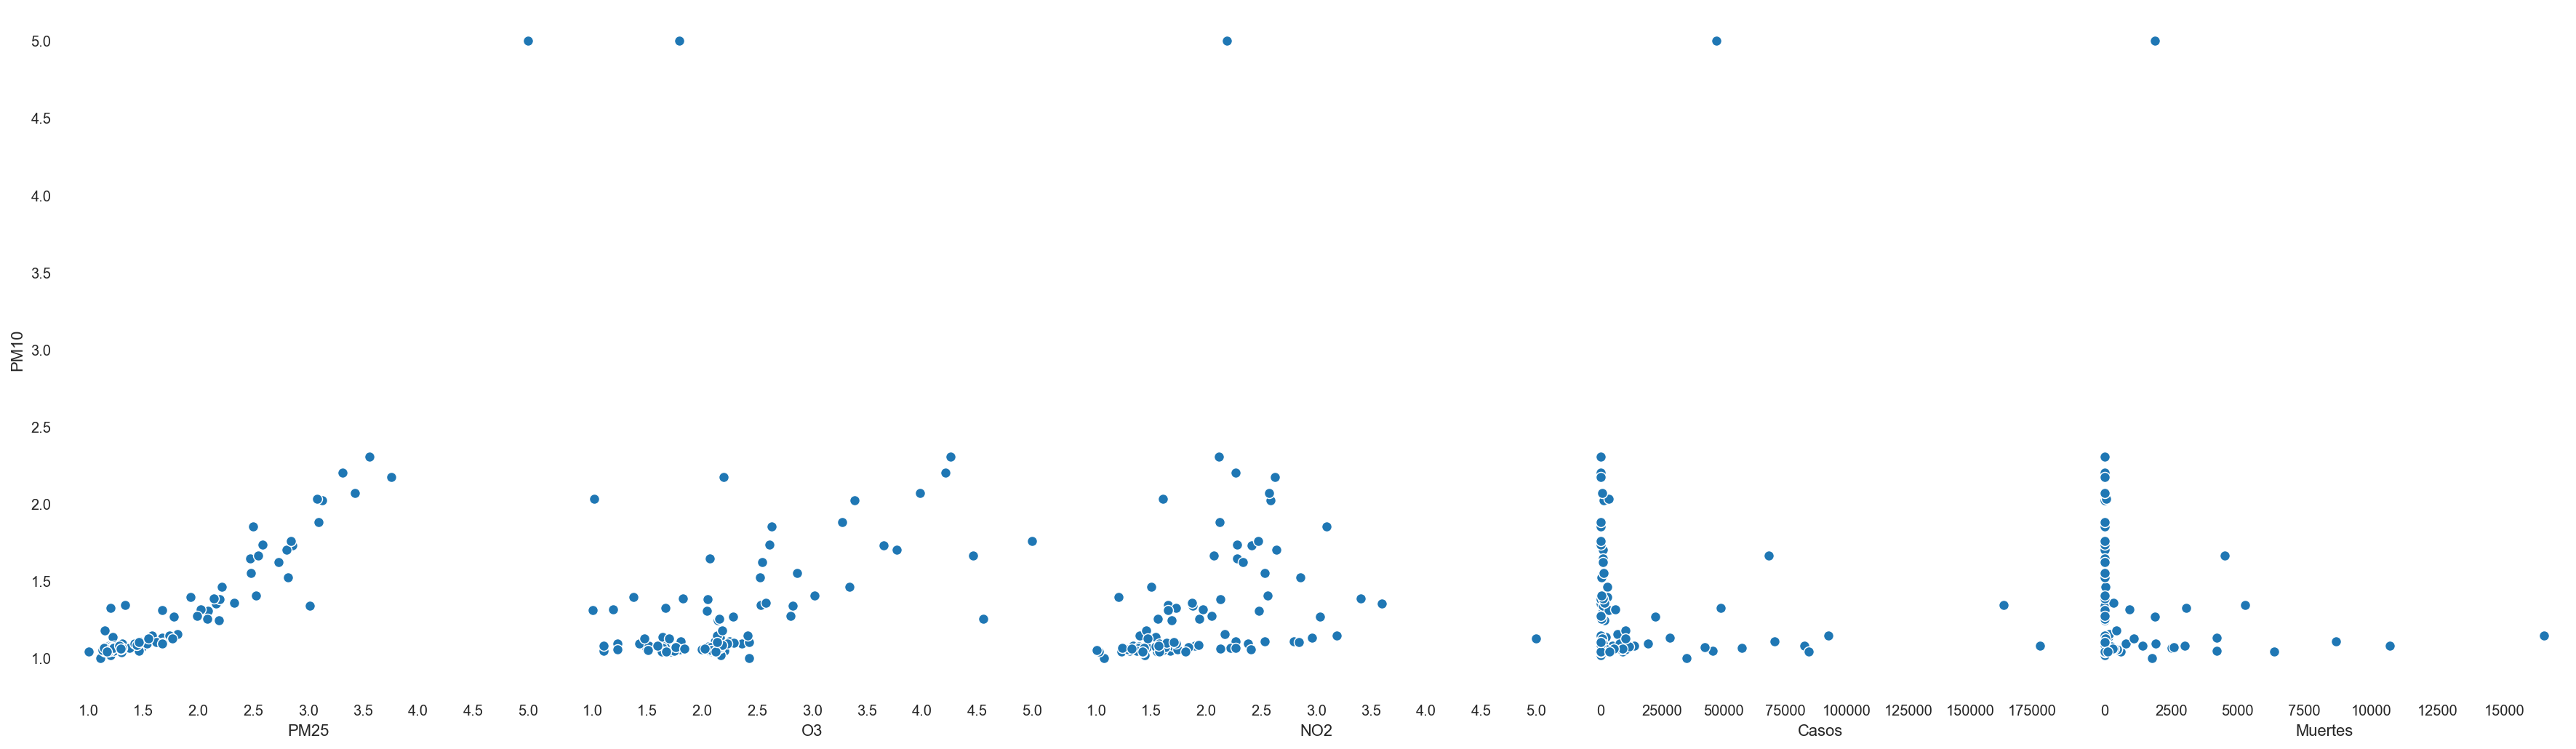

In [39]:
#Lienalidad
import seaborn as sns
p = sns.pairplot(dfinal, x_vars=['PM25','O3','NO2','Casos','Muertes'], y_vars='PM10', size=7, aspect=0.7)

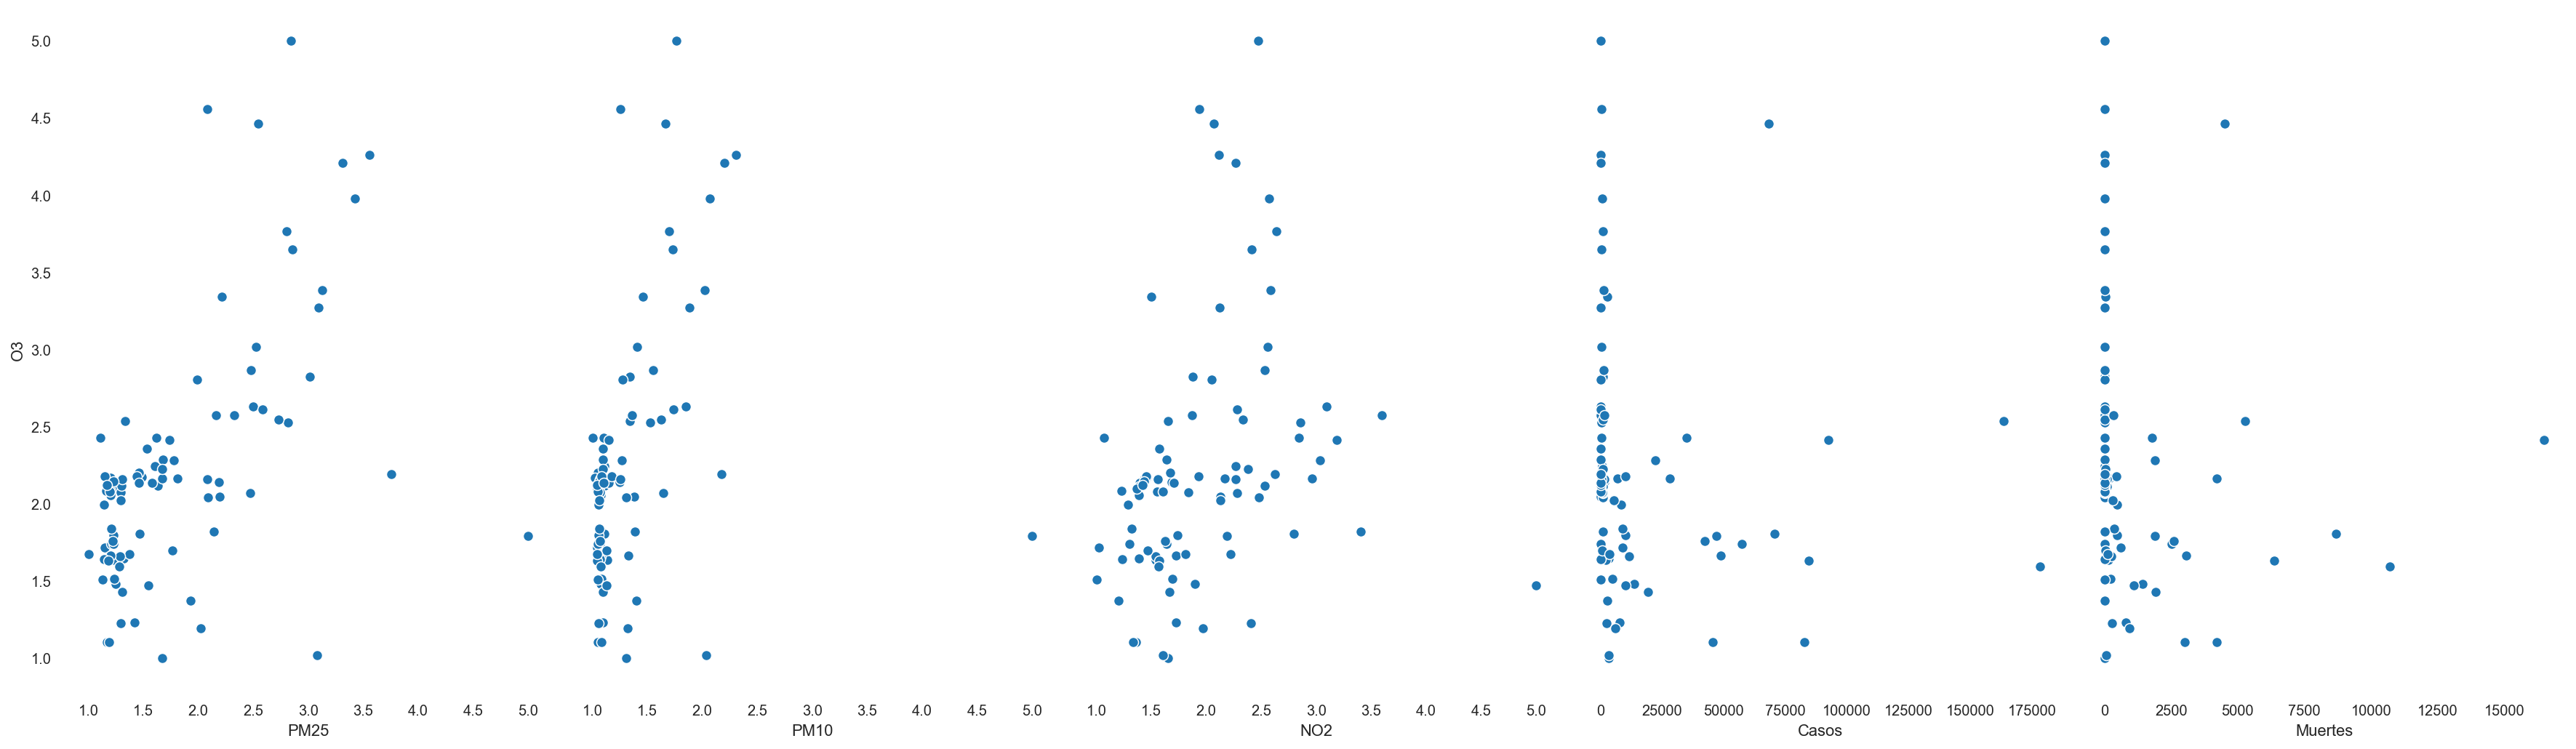

In [43]:
#Lienalidad
import seaborn as sns
p = sns.pairplot(dfinal, x_vars=['PM25','PM10','NO2','Casos','Muertes'], y_vars='O3', size=7, aspect=0.7)

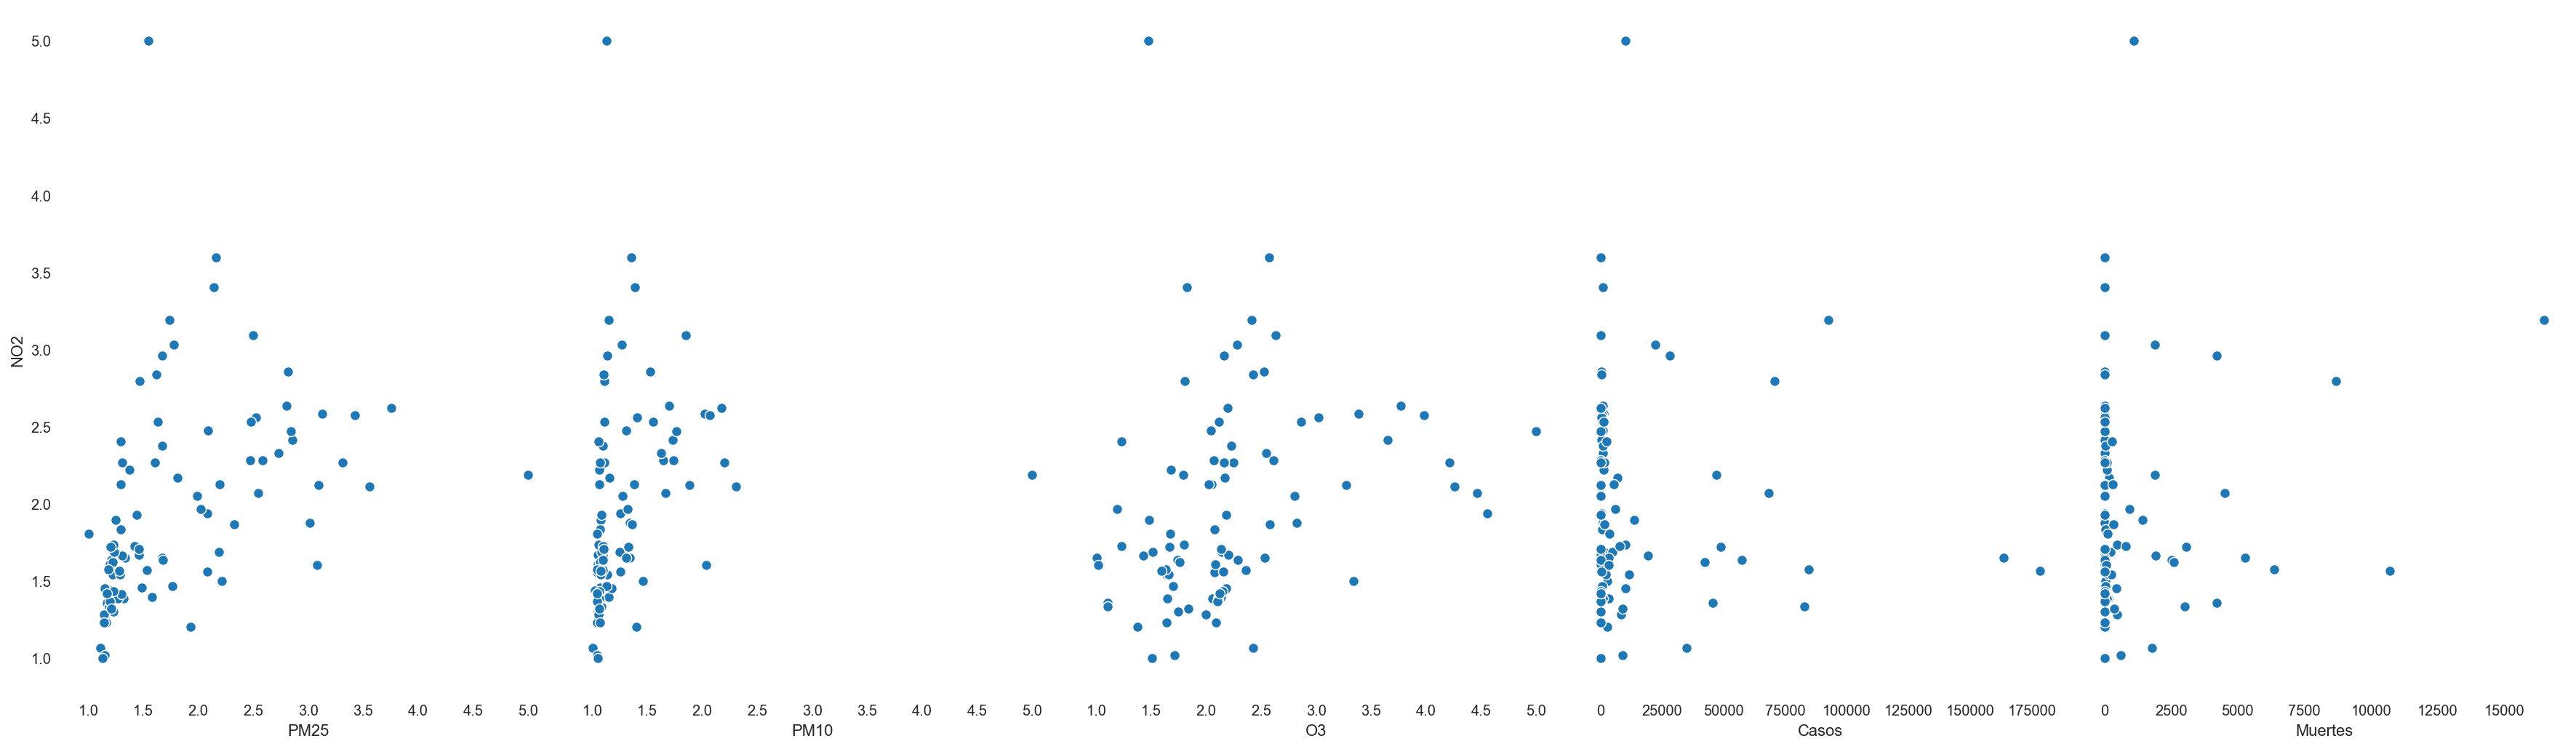

In [44]:
#Lienalidad
import seaborn as sns
p = sns.pairplot(dfinal, x_vars=['PM25','PM10','O3','Casos','Muertes'], y_vars='NO2', size=7, aspect=0.7)

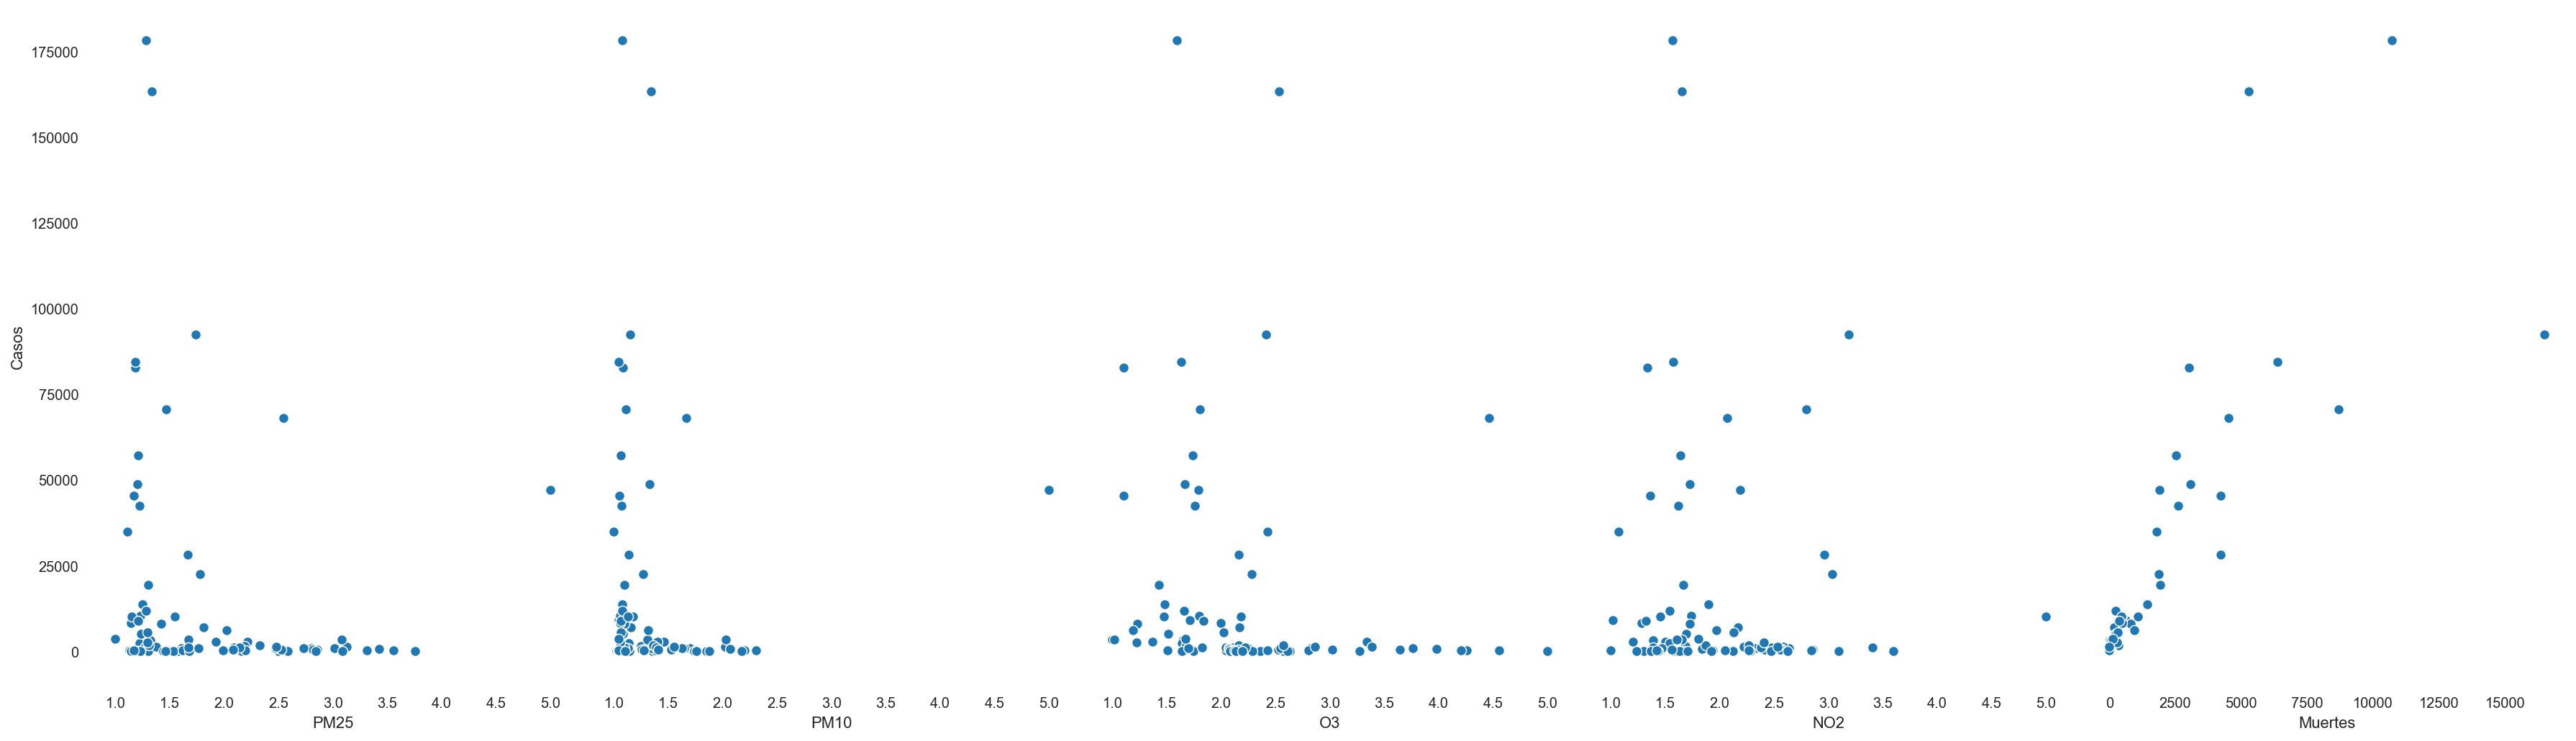

In [45]:
#Lienalidad
import seaborn as sns
p = sns.pairplot(dfinal, x_vars=['PM25','PM10','O3','NO2','Muertes'], y_vars='Casos', size=7, aspect=0.7)

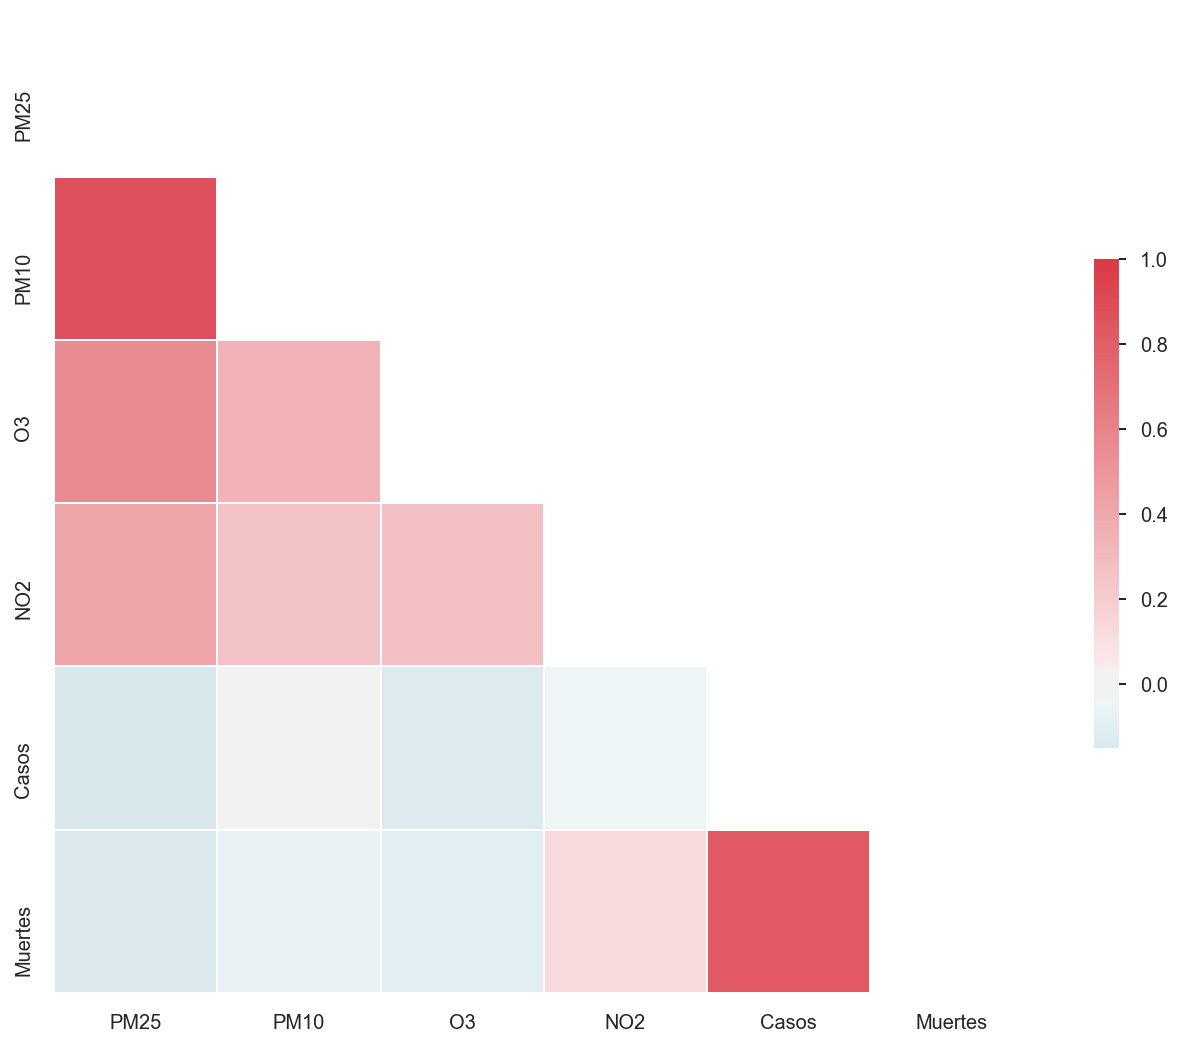

In [42]:
#Multicolinearidad
corr = dfinal.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [67]:
l.remove('PM25')
l

['PM10', 'O3', 'NO2', 'Casos']

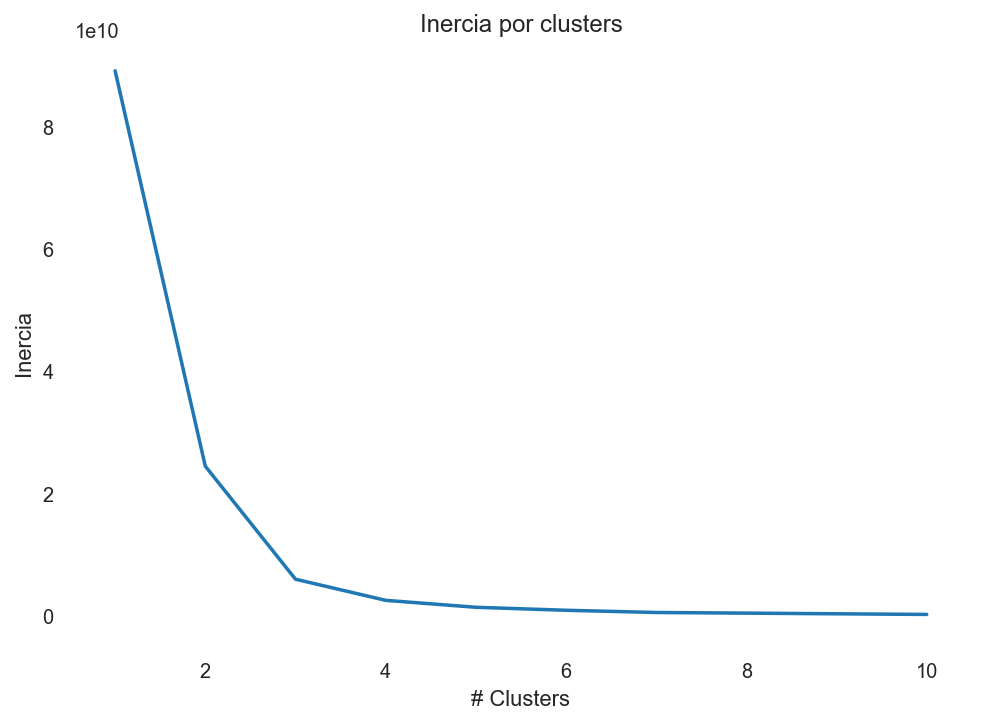

In [84]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

X = dfinal[['PM25', 'PM10','O3','NO2','Casos']].values
y = dfinal[['Muertes']].values


inertias = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertias)
plt.title('Inercia por clusters')
plt.xlabel('# Clusters')
plt.ylabel('Inercia') 
plt.show()

In [49]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [50]:
y_kmeans

array([0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [87]:
def clusters(var1,var2):
    X = dfinal[['PM25', 'PM10','O3','NO2','Casos']].values
    kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 0)
    y_kmeans = kmeans.fit_predict(X)
    if(var1=='PM25'):
        n1 = 0
    elif(var1=='PM10'):
        n1 = 1
    elif(var1=='O3'):
        n1 = 2
    elif(var1=='NO2'):
        n1 = 3
    else:
        n1 = 4
    
    if(var2=='PM25'):
        n2 = 0
    elif(var2=='PM10'):
        n2 = 1
    elif(var2=='O3'):
        n2 = 2
    elif(var2=='NO2'):
        n2 = 3
    else:
        n2 = 4
    plt.scatter(X[y_kmeans == 0, n1], X[y_kmeans == 0, n2], s = 15, c = 'red', label = 'Pocas Muertes')
    plt.scatter(X[y_kmeans == 1, n1], X[y_kmeans == 1, n2], s = 15, c = 'blue', label = 'Muertes Rregulares')
    plt.scatter(X[y_kmeans == 2, n1], X[y_kmeans == 2, n2], s = 15, c = 'green', label = 'Muchas Muertes')

    plt.legend()

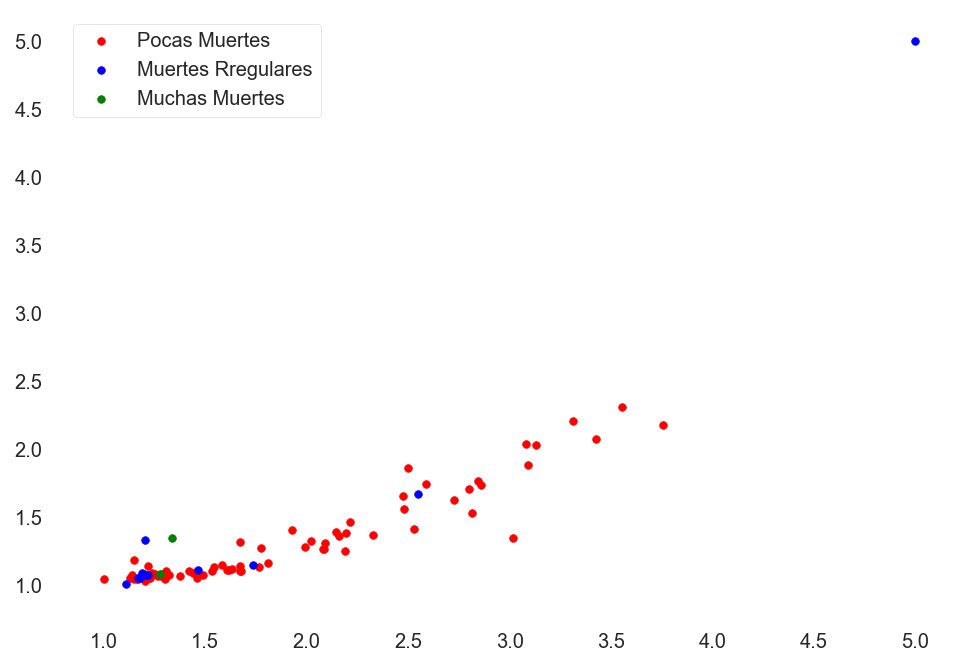

In [91]:
clusters('PM25','PM10') # cambia el nombre de los contaminantes para ver que tmb cambia el clustering